In [1]:
#use the Q2 2016 data first
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
#using pysio
from pyiso import client_factory

sd = datetime.datetime(year=2016, month=1, day=1, hour=0, minute=0, second=0)
ed = datetime.datetime(year=2016, month=1, day=31, hour=23, minute=0, second=0)

pjmclient = client_factory('PJM', timeout_seconds=120)
ret = pjmclient.get_load(start_at=sd, end_at=ed)

In [14]:
from datetime import timezone

def utc_to_local(utc_dt):
    return utc_dt.replace(tzinfo=timezone.utc).astimezone(tz=None)

In [32]:
ret[0]

{'ba_name': 'PJM',
 'freq': '1hr',
 'load_MW': 76169.255,
 'market': 'DAHR',
 'timestamp': Timestamp('2016-01-01 05:00:00+0000', tz='UTC')}

In [38]:
#do it without pandas
startdate = sd
enddate = ed

pyiso_data = {}
while startdate <= enddate:
    pyiso_data[startdate] = 0.0
    startdate += datetime.timedelta(hours=1)

for item in ret:
    t = item['timestamp'].to_pydatetime()
    tk = datetime.datetime(t.year, t.month, t.day, t.hour, t.minute, t.second)
    if tk not in pyiso_data.keys():
        pyiso_data[tk] = item['load_MW']
    else:
        pyiso_data[tk] += item['load_MW']

In [39]:
pyiso_data

{datetime.datetime(2016, 1, 1, 0, 0): 0.0,
 datetime.datetime(2016, 1, 1, 1, 0): 0.0,
 datetime.datetime(2016, 1, 1, 2, 0): 0.0,
 datetime.datetime(2016, 1, 1, 3, 0): 0.0,
 datetime.datetime(2016, 1, 1, 4, 0): 0.0,
 datetime.datetime(2016, 1, 1, 5, 0): 76169.255,
 datetime.datetime(2016, 1, 1, 6, 0): 74087.963,
 datetime.datetime(2016, 1, 1, 7, 0): 72329.2,
 datetime.datetime(2016, 1, 1, 8, 0): 71574.892,
 datetime.datetime(2016, 1, 1, 9, 0): 71830.003,
 datetime.datetime(2016, 1, 1, 10, 0): 73351.677,
 datetime.datetime(2016, 1, 1, 11, 0): 75415.295,
 datetime.datetime(2016, 1, 1, 12, 0): 77176.364,
 datetime.datetime(2016, 1, 1, 13, 0): 78499.044,
 datetime.datetime(2016, 1, 1, 14, 0): 80815.425,
 datetime.datetime(2016, 1, 1, 15, 0): 82968.757,
 datetime.datetime(2016, 1, 1, 16, 0): 84081.248,
 datetime.datetime(2016, 1, 1, 17, 0): 84390.643,
 datetime.datetime(2016, 1, 1, 18, 0): 83903.716,
 datetime.datetime(2016, 1, 1, 19, 0): 83386.541,
 datetime.datetime(2016, 1, 1, 20, 0): 836

In [6]:
datapath = "/home/chase/projects/peakload/data/pjm/"

In [26]:
#do it without pandas
startdate = sd
enddate = ed

data = {}
while startdate <= enddate:
    data[startdate] = 0.0
    startdate += datetime.timedelta(hours=1)

datafiles = os.listdir(datapath)
for f in datafiles:
    with open(datapath + "/" + f, 'r') as d:
        lines = d.readlines()
        for line in lines[1:]:
            tokens = line.strip().split(",")
            dt = datetime.datetime.strptime(tokens[0], "%m/%d/%Y %I:%M:%S %p")
            try:
                val = float(tokens[7].strip())
                data[dt] += val
            except Exception as err:
                #print(err)
                #print(tokens)
                pass

In [40]:
data

{datetime.datetime(2016, 1, 1, 0, 0): 0.0,
 datetime.datetime(2016, 1, 1, 1, 0): 0.0,
 datetime.datetime(2016, 1, 1, 2, 0): 0.0,
 datetime.datetime(2016, 1, 1, 3, 0): 0.0,
 datetime.datetime(2016, 1, 1, 4, 0): 0.0,
 datetime.datetime(2016, 1, 1, 5, 0): 0.0,
 datetime.datetime(2016, 1, 1, 6, 0): 0.0,
 datetime.datetime(2016, 1, 1, 7, 0): 0.0,
 datetime.datetime(2016, 1, 1, 8, 0): 57647.0,
 datetime.datetime(2016, 1, 1, 9, 0): 14578.0,
 datetime.datetime(2016, 1, 1, 10, 0): 0.0,
 datetime.datetime(2016, 1, 1, 11, 0): 0.0,
 datetime.datetime(2016, 1, 1, 12, 0): 0.0,
 datetime.datetime(2016, 1, 1, 13, 0): 0.0,
 datetime.datetime(2016, 1, 1, 14, 0): 0.0,
 datetime.datetime(2016, 1, 1, 15, 0): 0.0,
 datetime.datetime(2016, 1, 1, 16, 0): 0.0,
 datetime.datetime(2016, 1, 1, 17, 0): 0.0,
 datetime.datetime(2016, 1, 1, 18, 0): 0.0,
 datetime.datetime(2016, 1, 1, 19, 0): 35911.0,
 datetime.datetime(2016, 1, 1, 20, 0): 18949.0,
 datetime.datetime(2016, 1, 1, 21, 0): 0.0,
 datetime.datetime(2016, 1

In [105]:
hours = sorted(data.keys())
loads = []
for hour in hours:
    loads.append(data[hour])

In [106]:
#for h in hours[-600:-500]:
for h in hours[-12000:-11900]:
    print(h, data[h])

2016-11-17 01:00:00 14586.0
2016-11-17 02:00:00 39630.0
2016-11-17 03:00:00 7632.0
2016-11-17 04:00:00 8221.0
2016-11-17 05:00:00 0.0
2016-11-17 06:00:00 0.0
2016-11-17 07:00:00 0.0
2016-11-17 08:00:00 0.0
2016-11-17 09:00:00 0.0
2016-11-17 10:00:00 0.0
2016-11-17 11:00:00 0.0
2016-11-17 12:00:00 0.0
2016-11-17 13:00:00 34473.0
2016-11-17 14:00:00 20788.0
2016-11-17 15:00:00 20788.0
2016-11-17 16:00:00 7470.0
2016-11-17 17:00:00 0.0
2016-11-17 18:00:00 84950.0
2016-11-17 19:00:00 7292.0
2016-11-17 20:00:00 0.0
2016-11-17 21:00:00 0.0
2016-11-17 22:00:00 0.0
2016-11-17 23:00:00 0.0
2016-11-18 00:00:00 990.0
2016-11-18 01:00:00 25589.0
2016-11-18 02:00:00 24941.0
2016-11-18 03:00:00 9774.0
2016-11-18 04:00:00 8030.0
2016-11-18 05:00:00 0.0
2016-11-18 06:00:00 0.0
2016-11-18 07:00:00 0.0
2016-11-18 08:00:00 0.0
2016-11-18 09:00:00 0.0
2016-11-18 10:00:00 0.0
2016-11-18 11:00:00 0.0
2016-11-18 12:00:00 0.0
2016-11-18 13:00:00 46408.0
2016-11-18 14:00:00 9599.0
2016-11-18 15:00:00 14802.0
2

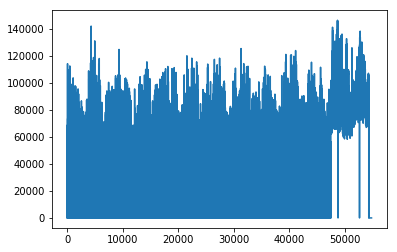

In [107]:
plt.plot(loads)
plt.show()

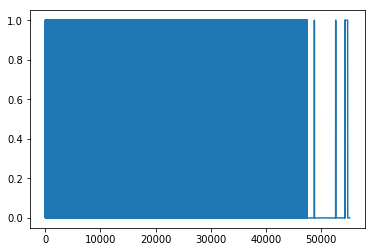

In [116]:
empties = []
for l in loads:
    if l < 1.0:
        empties.append(1.0)
    else:
        empties.append(0.0)
        
plt.plot(empties)
plt.show()

In [117]:
len(empties)

55135

In [112]:
np.sum(empties)/float(len(empties))

0.56385911738392158

In [131]:
#aggregate
agg_data = {}
hours = sorted(data.keys())
for h in hours:
    t = datetime.datetime(year=2016, month=h.month, day=h.day, hour=h.hour, minute=h.minute, second=h.second)
    if t not in agg_data.keys():
        agg_data[t] = data[h]
    else:
        agg_data[t] += data[h]
        
agg_hours = sorted(agg_data.keys())
agg_loads = []
for h in agg_hours:
    agg_loads.append(agg_data[h])

In [132]:
agg_empties = []
for l in agg_loads:
    if l < 1.0:
        agg_empties.append(1.0)
    else:
        agg_empties.append(0.0)

print(np.sum(agg_empties)/float(len(agg_empties)))

0.0949453551913


In [142]:
for t in agg_hours[2000:2100]:
    print(agg_data[t])

0.0
0.0
0.0
0.0
0.0
66333.0
58736.0
131341.0
120599.0
55087.0
77010.0
5193.0
539169.0
13777.0
0.0
0.0
0.0
24986.0
173994.0
144033.0
81088.0
8850.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
59670.0
94926.0
138130.0
114095.0
22586.0
75993.0
123951.0
405408.0
38643.0
0.0
0.0
0.0
39174.0
153266.0
195943.0
42728.0
0.0
0.0
0.0
0.0
0.0
0.0
1794.0
0.0
56295.0
18246.0
254330.0
74622.0
80547.0
13999.0
13059.0
543357.0
12847.0
0.0
0.0
11822.0
45081.0
261474.0
86022.0
37044.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
51866.0
12956.0
201913.0
98612.0
57294.0
81365.0
0.0
520657.0
34780.0
0.0
0.0
1612.0
39370.0
117165.0
248482.0
27479.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


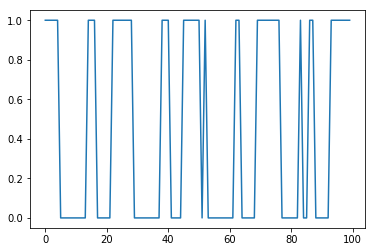

In [143]:
plt.plot(agg_empties[2000:2100])
plt.show()

In [87]:
backsum = []
counter = 0
for i in reversed(empties):
    if i > 0:
        backsum.append(counter)
        counter+=1
    else:
        backsum.append(counter)

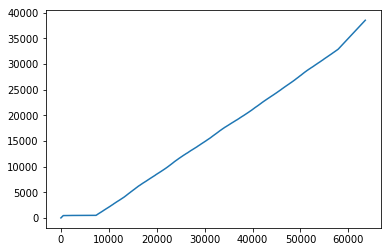

In [88]:
plt.plot(backsum)
plt.show()

In [48]:
#starts at index -7491
print(hours[-7491])

2017-05-23 22:00:00


In [48]:
dframe = pd.read_csv(datapath + f)

In [49]:
dframe['area'].unique()

array(['AEP', 'AP', 'ATSI', 'ComEd', 'DEOK', 'Dayton', 'Dom', 'Duq',
       'EKPC', 'MidAtl', 'MidAtl - East', 'MidAtl - West'], dtype=object)

In [63]:
dframe.loc[dframe['area'] == 'EKPC'].shape

(5555, 9)

In [50]:
AEP = dframe.loc[dframe['area'] == 'AEP']
AEP = AEP.reset_index(drop=True)

In [7]:
#AEP_sorted = AEP.sort_values(by='actual_load', ascending=False)
AEP_top = AEP.loc[AEP['actual_load'] > 22000.0]

In [8]:
peaks = AEP_top.index

In [59]:
AEP.shape

(5555, 9)

In [29]:
w = 1
AEP.iloc[168*w:168*(w+1)]["actual_load"].argmax()

184

In [78]:
print(AEP)

      datetime_beginning_utc  datetime_beginning_ept     datetime_ending_utc  \
0      12/31/2017 5:00:00 AM  12/31/2017 12:00:00 AM   12/31/2017 6:00:00 AM   
1      12/31/2017 4:00:00 AM  12/30/2017 11:00:00 PM   12/31/2017 5:00:00 AM   
2      12/31/2017 3:00:00 AM  12/30/2017 10:00:00 PM   12/31/2017 4:00:00 AM   
3      12/31/2017 2:00:00 AM   12/30/2017 9:00:00 PM   12/31/2017 3:00:00 AM   
4      12/31/2017 1:00:00 AM   12/30/2017 8:00:00 PM   12/31/2017 2:00:00 AM   
5     12/31/2017 12:00:00 AM   12/30/2017 7:00:00 PM   12/31/2017 1:00:00 AM   
6     12/30/2017 11:00:00 PM   12/30/2017 6:00:00 PM  12/31/2017 12:00:00 AM   
7     12/30/2017 10:00:00 PM   12/30/2017 5:00:00 PM  12/30/2017 11:00:00 PM   
8      12/30/2017 9:00:00 PM   12/30/2017 4:00:00 PM  12/30/2017 10:00:00 PM   
9      12/30/2017 8:00:00 PM   12/30/2017 3:00:00 PM   12/30/2017 9:00:00 PM   
10     12/30/2017 7:00:00 PM   12/30/2017 2:00:00 PM   12/30/2017 8:00:00 PM   
11     12/30/2017 6:00:00 PM   12/30/201

In [87]:
import datetime

for i in range(len((AEP['datetime_beginning_ept']))-1):
    a = datetime.datetime.strptime(AEP['datetime_beginning_ept'][i], "%m/%d/%Y %H:%M:%S %p")
    b = datetime.datetime.strptime(AEP['datetime_beginning_ept'][i+1], "%m/%d/%Y %H:%M:%S %p")
    print(a-b)

1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00

1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:0

-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
1:00:00
-1 day, 13:00:00
1 day, 1:0

In [53]:
#find max "actual_load" in groups of 168 hours
hours = AEP.shape[0]
weeks = int(hours/168.0)

weekly_peaks = np.zeros((hours,1))

for w in range(weeks):
    try:
        peak = AEP.iloc[168*w:168*(w+1)]["actual_load"].argmax()
        
    except:
        peak = AEP.iloc[168*w:]["actual_load"].argmax()
    print(peak)
    weekly_peaks[peak,0] = 1.0

64
232
425
545
809
977
1097
1217
1482
1578
1770
1977
2096
2289
2409
2553
2816
2936
3156
3273
3440
3586
3826
3923
4091
4259
4403
4572
4810
4981
5145
5336
5531


In [41]:
weekly_peaks

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

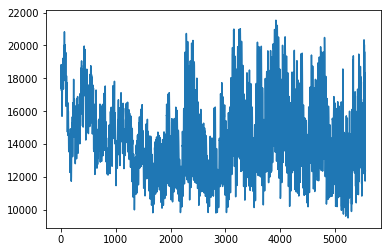

In [52]:
loads = AEP['actual_load'].get_values()

plt.plot(loads)
plt.show()

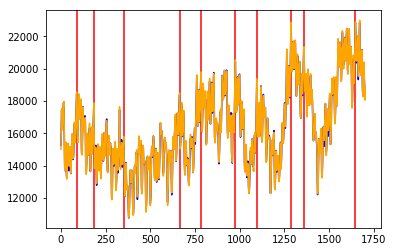

In [43]:
loads = AEP['actual_load'].get_values()
forecasts = AEP['area_load_forecast'].get_values()

#plt.axvline(x=0.22058956)
for p in range(weekly_peaks.shape[0]):
    if weekly_peaks[p,0] > 0:
        plt.axvline(x=p, color='red')

plt.plot(loads, color="blue")
plt.plot(forecasts, color="orange")
plt.show()

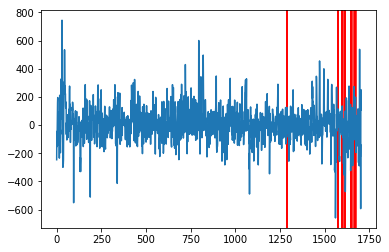

In [32]:
for p in peaks:
    plt.axvline(x=p, color='red')

plt.plot(forecasts - loads)
plt.show()

[ -85.51  125.45   26.28   45.42  113.8    72.28  135.65  -61.22  -52.24
   31.66    6.49   97.82    6.3  -172.42    3.05   44.2   -60.87   33.34
   36.91  -37.75   52.38  198.11  -91.08]


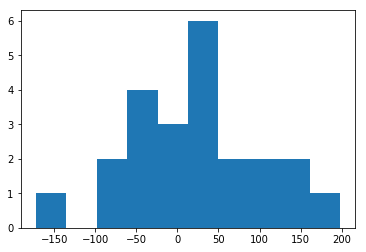

In [33]:
print((forecasts-loads)[peaks])
plt.hist((forecasts-loads)[peaks])
plt.show()

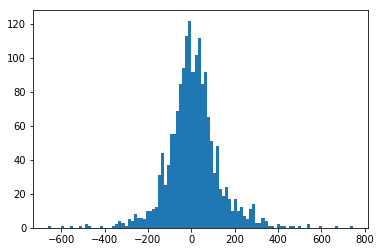

In [34]:
plt.hist(forecasts-loads, bins=100)
plt.show()

In [55]:
#lets do ERCOT
path = "/home/chase/projects/peakload/data/ercot/"
ercot2017 = pd.read_excel(path + "native_Load_2017.xlsx")
ercot2016 = pd.read_excel(path + "native_Load_2016.xlsx")
ercot2015 = pd.read_excel(path + "native_Load_2015.xls")
ercot2014 = pd.read_excel(path + "2014_ERCOT_Hourly_Load_Data.xls")
ercot2013 = pd.read_excel(path + "2013_ERCOT_Hourly_Load_Data.xls")
ercot2012 = pd.read_excel(path + "2012_ERCOT_Hourly_Load_Data.xls")
ercot2011 = pd.read_excel(path + "2011_ERCOT_Hourly_Load_Data.xls")
ercot2010 = pd.read_excel(path + "2010_ERCOT_Hourly_Load_Data.xls")



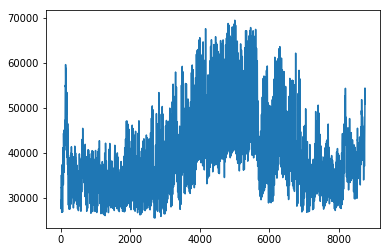

In [43]:
plt.plot(ercot['ERCOT'])
plt.show()

In [46]:
sd = datetime.datetime(year=2017, month=1, day=1, hour=0, minute=0, second=0)
ed = datetime.datetime(year=2017, month=1, day=31, hour=23, minute=0, second=0)

ercotclient = client_factory('ERCOT', timeout_seconds=120)
#ret = pjmclient.get_load(start_at=sd, end_at=ed)
ret = ercotclient.get_load(latest=True)

In [47]:
ret

[{'ba_name': 'ERCOT',
  'freq': '5m',
  'load_MW': 41453.0,
  'market': 'DAHR',
  'timestamp': datetime.datetime(2018, 3, 27, 22, 33, 10, tzinfo=<UTC>)}]

In [57]:
ercotdata = list(ercot2010['ERCOT']) + list(ercot2011['ERCOT']) + list(ercot2012['ERCOT']) + list(ercot2013['ERCOT']) + list(ercot2014['ERCOT']) + list(ercot2015['ERCOT']) + list(ercot2016['ERCOT']) + list(ercot2017['ERCOT'])

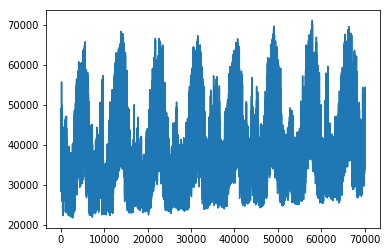

In [58]:
plt.plot(ercotdata)
plt.show()

In [ ]:
#subtract off the annual load growth
yearly_loads = np.zeros(8,)